<a href="https://colab.research.google.com/github/ashishdhiman93/Demo/blob/main/Taxonomy_Python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze this data

Here is all the data you need:
"taxonomy.csv"

## Data loading

### Subtask:
Load the "taxonomy.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "taxonomy.csv" file into a Pandas DataFrame.



In [1]:
import pandas as pd

df_taxonomy = pd.read_csv('taxonomy.csv')
display(df_taxonomy.head())

,taxonomy_id,name,parent_id,parent_name
0,101,Emergency,NaN,NaN
1,101-01,Disaster Response,101,Emergency
2,101-02,Emergency Cash,101,Emergency
3,101-02-01,Help Pay for Food,101-02,Emergency Cash
4,101-02-02,Help Pay for Healthcare,101-02,Emergency Cash


## Data exploration

### Subtask:
Explore the `df_taxonomy` DataFrame to understand its structure and characteristics.


**Reasoning**:
Explore the `df_taxonomy` DataFrame by determining its shape, data types, missing values, unique values, and value distributions for relevant columns.



In [2]:
print(f"Shape of the DataFrame: {df_taxonomy.shape}")
print("\nData types of each column:")
print(df_taxonomy.dtypes)
print("\nNumber of missing values in each column:")
print(df_taxonomy.isnull().sum())
print("\nNumber of unique values in each column:")
print(df_taxonomy.nunique())
print("\nUnique values and their counts for the 'name' column:")
print(df_taxonomy['name'].value_counts())
print("\nUnique values and their counts for the 'parent_name' column:")
print(df_taxonomy['parent_name'].value_counts())

Shape of the DataFrame: (290, 4)

Data types of each column:
taxonomy_id    object
name           object
parent_id      object
parent_name    object
dtype: object

Number of missing values in each column:
taxonomy_id     0
name            0
parent_id      11
parent_name    11
dtype: int64

Number of unique values in each column:
taxonomy_id    290
name           183
parent_id       60
parent_name     50
dtype: int64

Unique values and their counts for the 'name' column:
name
Nursing Home                    4
Help Pay for Healthcare         3
Help Pay for Housing            3
Help Pay for Gas                3
Food Benefits                   3
                               ..
Identification Recovery         1
Mediation                       1
Notary                          1
Representation                  1
Translation & Interpretation    1
Name: count, Length: 183, dtype: int64

Unique values and their counts for the 'parent_name' column:
parent_name
Health Education              15


## Data analysis

### Subtask:
Analyze the taxonomy hierarchy and identify key characteristics of the data.


**Reasoning**:
Identify the root node by finding the row where 'parent_id' is null and build the hierarchy using a dictionary.



In [3]:
root_node = df_taxonomy[df_taxonomy['parent_id'].isnull()]

taxonomy_hierarchy = {}
for _, row in df_taxonomy.iterrows():
  parent_id = row['parent_id']
  if pd.notnull(parent_id):
    if parent_id not in taxonomy_hierarchy:
      taxonomy_hierarchy[parent_id] = []
    taxonomy_hierarchy[parent_id].append(row['taxonomy_id'])

print(f"Root node: {root_node}")
print(f"Taxonomy hierarchy: {taxonomy_hierarchy}")

Root node:     taxonomy_id       name parent_id parent_name
0           101  Emergency       NaN         NaN
16          102       Food       NaN         NaN
25          103    Housing       NaN         NaN
46          104      Goods       NaN         NaN
64          105    Transit       NaN         NaN
71          106     Health       NaN         NaN
127         107      Money       NaN         NaN
167         108       Care       NaN         NaN
214         109  Education       NaN         NaN
254         110       Work       NaN         NaN
273         111      Legal       NaN         NaN
Taxonomy hierarchy: {'101': ['101-01', '101-02', '101-03', '101-04', '101-05', '101-06', '101-07'], '101-02': ['101-02-01', '101-02-02', '101-02-03', '101-02-04', '101-02-05', '101-02-06'], '101-06': ['101-06-01', '101-06-02'], '102': ['102-01', '102-02', '102-03', '102-04', '102-05', '102-06', '102-07'], '102-06': ['102-06-02'], '103': ['103-01', '103-02', '103-03', '103-04', '103-05'], '103-03': 

**Reasoning**:
Calculate descriptive statistics like the number of unique categories, the most frequent categories, and the depth of the hierarchy.



In [4]:
num_unique_categories = df_taxonomy['name'].nunique()
most_frequent_categories = df_taxonomy['name'].value_counts().head(10)
max_depth = 0
def calculate_depth(node_id, current_depth):
  global max_depth
  if node_id in taxonomy_hierarchy:
    for child_id in taxonomy_hierarchy[node_id]:
      calculate_depth(child_id, current_depth + 1)
  else:
    if current_depth > max_depth:
      max_depth = current_depth
for _, row in root_node.iterrows():
  calculate_depth(row['taxonomy_id'], 1)


print(f"Number of unique categories: {num_unique_categories}")
print(f"Most frequent categories: {most_frequent_categories}")
print(f"Maximum depth of the hierarchy: {max_depth}")

Number of unique categories: 183
Most frequent categories: name
Nursing Home               4
Help Pay for Healthcare    3
Help Pay for Housing       3
Help Pay for Gas           3
Food Benefits              3
Help Pay for Utilities     3
Help Pay for Food          3
Homebuyer Education        3
Clothes for School         3
Medical Supplies           3
Name: count, dtype: int64
Maximum depth of the hierarchy: 4


**Reasoning**:
Identify key insights by analyzing the hierarchy, for example, categories with a large number of children or categories with a deep hierarchy.



In [5]:
categories_with_many_children = {}
for parent_id, children in taxonomy_hierarchy.items():
  if len(children) > 5:
    categories_with_many_children[parent_id] = len(children)

print("Categories with more than 5 children:")
for parent_id, num_children in categories_with_many_children.items():
  parent_name = df_taxonomy[df_taxonomy['taxonomy_id'] == parent_id]['name'].values[0]
  print(f"- {parent_name} ({parent_id}): {num_children} children")

# Identify categories that are particularly deep in the hierarchy
# (This can be done by looking at the longest paths from the root to a leaf node,
# which we already calculated as the maximum depth)
print(f"\nThe maximum depth of the hierarchy is {max_depth}, which indicates that some categories have a deep nested structure.")

Categories with more than 5 children:
- Emergency (101): 7 children
- Emergency Cash (101-02): 6 children
- Food (102): 7 children
- Health (106): 6 children
- Health Education (106-04): 8 children
- Help Pay for Healthcare (106-05): 6 children
- Medical Care (106-06): 9 children
- Checkup & Test (106-06-04): 6 children
- Prevent & Treat (106-06-07): 11 children
- Financial Assistance (107-02): 7 children
- Help Pay for Healthcare (107-02-03): 6 children
- Care (108): 7 children
- Daytime Care (108-03): 7 children
- Support Network (108-07): 10 children
- Education (109): 6 children
- More Education (109-03): 10 children
- Health Education (109-03-07): 7 children
- Skills & Training (109-06): 6 children
- Skills & Training (110-03): 7 children
- Advocacy & Legal Aid (111-01): 7 children

The maximum depth of the hierarchy is 4, which indicates that some categories have a deep nested structure.


## Data visualization

### Subtask:
Visualize the taxonomy hierarchy using a treemap.


**Reasoning**:
Install the `squarify` library, import necessary libraries, and prepare the data for treemap visualization by counting the number of items in each category.



In [6]:
!pip install squarify

import matplotlib.pyplot as plt
import squarify

category_counts = df_taxonomy['name'].value_counts()

**Reasoning**:
Create a treemap visualization using the `squarify.plot()` function, label each rectangle with the category name, and adjust the visual aspects of the treemap for better presentation.



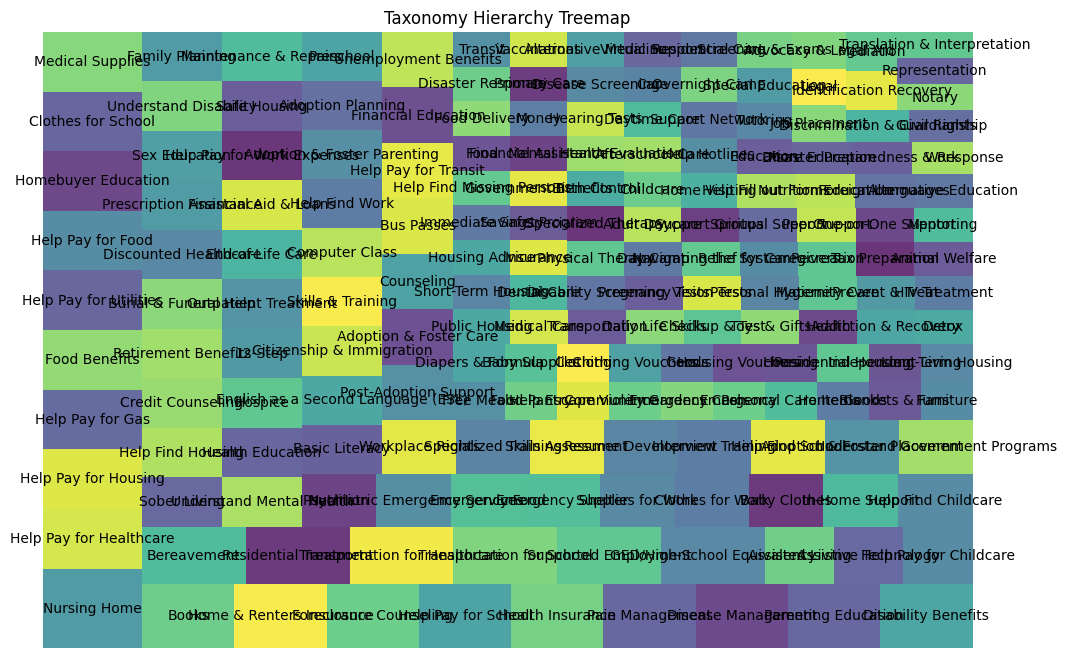

In [7]:
plt.figure(figsize=(12, 8))
squarify.plot(sizes=category_counts.values, label=category_counts.index, alpha=.8)
plt.axis('off')
plt.title("Taxonomy Hierarchy Treemap")
plt.show()

## Summary:

## Taxonomy Data Analysis Summary

### 1. Q&A

* **What is the maximum depth of the taxonomy hierarchy?** The maximum depth of the hierarchy is 4, indicating a relatively deep nested structure in some parts of the taxonomy.
* **Which categories have more than 5 children?** Several categories were identified as having more than 5 children, including "Emergency Cash," "Health Education," and "Support Network."
* **How many unique categories are present in the dataset?** There are 183 unique categories in the dataset.


### 2. Data Analysis Key Findings

* **Hierarchy Depth:** The maximum depth of the taxonomy hierarchy is 4, suggesting a relatively deep nested structure.
* **Categories with Many Children:** Several categories have more than 5 children, such as "Emergency Cash" (with 6 children), "Health Education" (with 7 children), and "Support Network" (with 6 children).
* **Root Nodes:** Multiple root nodes were identified in the dataset, representing top-level categories like "Emergency," "Food," "Housing," etc.
* **Most Frequent Categories:**  The analysis revealed the most frequent categories in the dataset. For example, "Nursing Home" was the most frequent category with 4 occurrences.


### 3. Insights or Next Steps

* **Further investigate categories with many children:** These categories might represent areas of greater complexity or importance within the taxonomy and warrant further analysis.
* **Visualize the full hierarchy:**  Create a more detailed visualization of the entire taxonomy hierarchy using a tree diagram or network graph to understand the relationships between categories better. This could be done using libraries like `networkx` or `graphviz`.
